Let's open the data we have already

In [3]:
import xarray as xr
import pandas as pd
import numpy as np

wal_pm = pd.read_csv("wal_full_data24h")
wal_weather = xr.open_dataset("wal_weather.nc").to_dataframe()

And prepare it:

In [4]:

wal_pm = wal_pm.rename(columns={'Unnamed: 0': 'date'})
wal_pm['date'] = pd.to_datetime(wal_pm['date'])
wal_pm = wal_pm.set_index('date')
wal_pm = wal_pm[['pm10']]

wal_weather = wal_weather.reset_index()
wal_weather['date'] = pd.to_datetime(wal_weather['date'])
wal_weather = wal_weather.set_index('date')
wal_weather = wal_weather.drop(wal_weather.index[0])
wal_weather = wal_weather.drop(wal_weather.index[-1])

wal_pm = pd.concat([wal_pm, wal_weather], axis=1)
wal_pm = wal_pm.drop(columns = ['cape_mean', 'cape_max', 'cape_min'], axis = 1)
wal_pm

,pm10,temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,snowfall_sum,wind_speed_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,...,surface_pressure_mean,surface_pressure_max,surface_pressure_min,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,wind_speed_10m_mean,wind_speed_10m_min,precipitation_hours,boundary_layer_height
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,2.300083,4.310500,0.4105,0.6,0.6,0.00,7.783316,241.579300,1.04,...,968.593201,973.224121,965.643127,84.359009,93.347153,76.609779,6.473415,4.465423,2.0,718.333313
2015-01-03,NaN,0.816750,1.860500,-0.4895,0.0,0.0,0.21,6.736468,255.062943,2.81,...,965.636414,970.659851,958.340332,76.418083,85.706589,67.662537,5.743515,4.477723,0.0,918.750000
2015-01-04,13.1,-0.291583,0.710500,-1.6395,1.9,0.3,1.33,7.874643,309.481964,3.28,...,965.169678,971.658936,958.558472,83.625832,89.970604,77.018280,6.875924,5.345091,12.0,1217.916626
2015-01-05,10.2,-0.847833,0.460500,-2.4895,8.4,0.0,5.88,6.881860,314.149841,0.88,...,970.669495,972.343018,968.631409,93.280952,98.554314,85.192207,5.284514,3.080584,13.0,765.625000
2015-01-06,66.4,-5.914501,-2.839500,-9.9395,0.0,0.0,0.00,3.275668,193.172546,3.25,...,973.287598,974.469177,972.338562,93.265137,96.656303,85.714058,1.776223,0.223607,0.0,111.666664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,7.8,3.027166,4.510500,0.9105,0.0,0.0,0.00,10.208329,233.513443,4.28,...,967.986023,970.928284,964.335510,78.796463,87.847900,63.973221,5.782278,2.624881,0.0,589.583313
2023-12-28,12.4,4.800083,6.360500,3.2605,0.0,0.0,0.00,10.430724,214.158920,3.15,...,962.816162,963.549622,962.023254,76.966934,85.996208,62.241528,8.925221,7.488657,0.0,343.750000
2023-12-29,12.5,7.139667,8.410501,5.1605,0.0,0.0,0.00,9.899495,223.687241,3.39,...,959.523010,961.694275,957.753113,80.429390,90.355545,72.525963,8.493058,6.862215,0.0,836.250000


In [5]:
wal_pm['month'] = wal_pm.index.month
wal_pm['weekday'] = wal_pm.index.weekday


# Lag features
for lag in [1, 2, 3]:
    #we use only weather data
    #wal_pm[f'pm10_lag{lag}'] = wal_pm['pm10'].shift(lag)
    wal_pm[f'temperature_2m_mean_lag{lag}'] = wal_pm['temperature_2m_mean'].shift(lag)
    wal_pm[f'precipitation_sum_lag{lag}'] = wal_pm['precipitation_sum'].shift(lag)
    wal_pm[f'boundary_layer_height_lag{lag}'] = wal_pm['boundary_layer_height'].shift(lag)
    wal_pm[f'wind_speed_10m_min_lag{lag}'] = wal_pm['wind_speed_10m_min'].shift(lag)
    wal_pm[f'wind_direction_10m_dominant_lag{lag}'] = wal_pm['wind_direction_10m_dominant'].shift(lag)

wal_pm = wal_pm.dropna()
wal_pm

,pm10,temperature_2m_mean,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,snowfall_sum,wind_speed_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,...,temperature_2m_mean_lag2,precipitation_sum_lag2,boundary_layer_height_lag2,wind_speed_10m_min_lag2,wind_direction_10m_dominant_lag2,temperature_2m_mean_lag3,precipitation_sum_lag3,boundary_layer_height_lag3,wind_speed_10m_min_lag3,wind_direction_10m_dominant_lag3
date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,10.2,-0.847833,0.460500,-2.489500,8.400000,0.000000,5.88,6.881860,314.149841,0.88,...,0.816750,0.0,918.750000,4.477723,255.062943,2.300083,0.600000,718.333313,4.465423,241.579300
2015-01-06,66.4,-5.914501,-2.839500,-9.939500,0.000000,0.000000,0.00,3.275668,193.172546,3.25,...,-0.291583,1.9,1217.916626,5.345091,309.481964,0.816750,0.000000,918.750000,4.477723,255.062943
2015-01-07,30.0,-4.060334,-1.339500,-8.789499,1.000000,0.000000,0.98,5.594640,209.744781,2.43,...,-0.847833,8.4,765.625000,3.080584,314.149841,-0.291583,1.900000,1217.916626,5.345091,309.481964
2015-01-08,22.2,0.093833,3.710500,-2.889500,5.500000,5.400000,0.14,7.793587,213.016693,2.19,...,-5.914501,0.0,111.666664,0.223607,193.172546,-0.847833,8.400000,765.625000,3.080584,314.149841
2015-01-09,11.6,3.650084,5.260500,1.360500,7.599999,7.599999,0.00,10.171037,263.017731,2.96,...,-4.060334,1.0,230.000000,2.690725,209.744781,-5.914501,0.000000,111.666664,0.223607,193.172546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,7.8,3.027166,4.510500,0.910500,0.000000,0.000000,0.00,10.208329,233.513443,4.28,...,8.237584,2.9,1116.666626,3.981206,242.727905,4.148000,12.400001,701.250000,2.332381,233.726822
2023-12-28,12.4,4.800083,6.360500,3.260500,0.000000,0.000000,0.00,10.430724,214.158920,3.15,...,7.208417,0.2,1041.250000,5.292448,242.176819,8.237584,2.900000,1116.666626,3.981206,242.727905
2023-12-29,12.5,7.139667,8.410501,5.160500,0.000000,0.000000,0.00,9.899495,223.687241,3.39,...,3.027166,0.0,589.583313,2.624881,233.513443,7.208417,0.200000,1041.250000,5.292448,242.176819


In [6]:
X = wal_pm.drop(columns=['pm10'])
y = wal_pm['pm10']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred = model.predict(X_test)

# Metryki
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.2f}")

RMSE: 11.89
R² score: 0.62


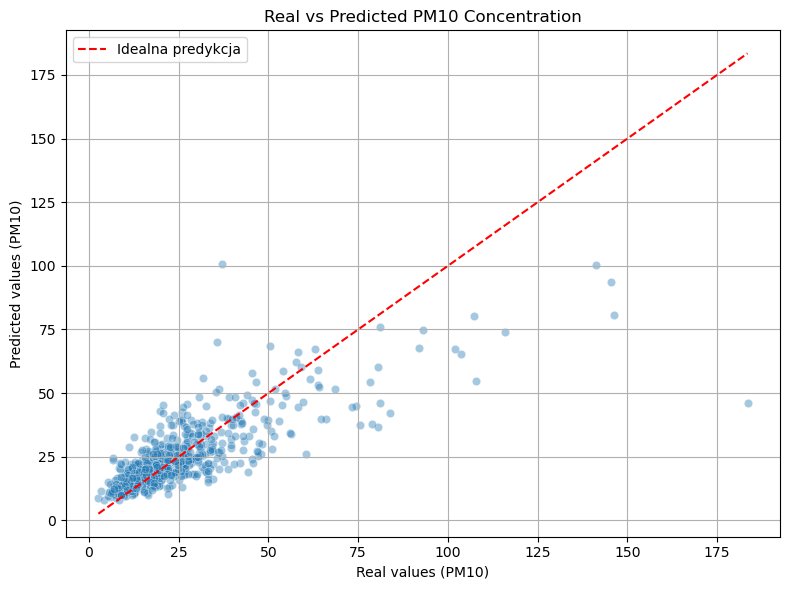

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tworzymy wykres scatter z linią idealnej predykcji
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)

# Linia idealna: predykcja == rzeczywistość
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Idealna predykcja')

plt.xlabel("Real values (PM10)")
plt.ylabel("Predicted values (PM10)")
plt.title("Real vs Predicted PM10 Concentration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

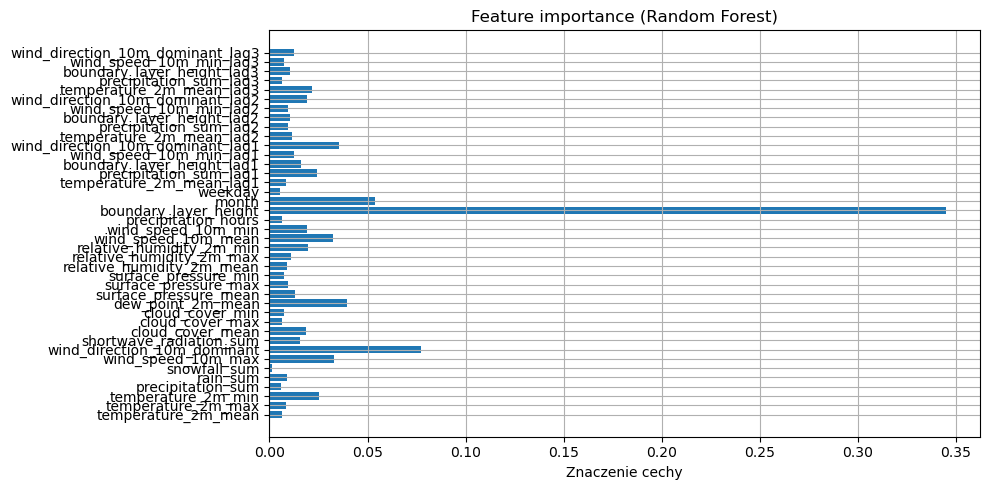

In [9]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,5))
plt.barh(feature_names, importances)
plt.xlabel('Znaczenie cechy')
plt.title('Feature importance (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

This time the prediction is even better!!

However, we clearly see that we have too many features, some of them of importance close to zero!!

Next time we will use PM25 data which are even more important for air pollution: smaller particles are more deadly.

We will use other functionalities of the packages to use only most important features, and to find best model parameters.